In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from keras.models import Model
from keras.models import Model
from keras import regularizers
from keras import Sequential
from keras.layers import Input,Dense
from keras.models import Model
from keras.layers import Dropout
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import sklearn
from keras import optimizers

Using TensorFlow backend.


In [2]:
# !pip install keras
# !pip install tensorflow

# Lidando com os dados

In [3]:
def transformData(dataSet):
    y = dataSet['label']
    X = dataSet.drop(columns=['label'])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = X_train/255
    X_val = X_val/255
    return (X_train, X_val, y_train, y_val)

In [4]:
data = pd.read_csv('fashion-mnist_train.csv')

In [5]:
(X_train, X_val, y_train, y_val) = transformData(data)

## Funções Gerais

In [6]:
def plotTrainValError(executionHistory):
    loss = executionHistory.history['loss']
    val_loss = executionHistory.history['val_loss']

    fig, ax = plt.subplots()
    plt.title("Custo de treino e validação pela época")
    plt.xlabel('Época')
    plt.ylabel('Custo')
    ax.plot(loss,label="Treino")
    ax.plot(val_loss,'r--',label="Validação")
    ax.legend()
    plt.show()

# Classificação com Rede Neural

## Tentativa 1

In [7]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history3 = model.fit(np.array(X_train),np.array(y_train),validation_data=(X_val, y_val),epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 90us/step - loss: 0.5258 - accuracy: 0.8129 - val_loss: 0.4011 - val_accuracy: 0.8557
Epoch 2/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.3861 - accuracy: 0.8603 - val_loss: 0.3696 - val_accuracy: 0.8653
Epoch 3/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.3473 - accuracy: 0.8739 - val_loss: 0.3571 - val_accuracy: 0.8687
Epoch 4/10
48000/48000 [==============================] - 4s 76us/step - loss: 0.3241 - accuracy: 0.8820 - val_loss: 0.3374 - val_accuracy: 0.8778
Epoch 5/10
48000/48000 [==============================] - 4s 75us/step - loss: 0.3052 - accuracy: 0.8872 - val_loss: 0.3253 - val_accuracy: 0.8789
Epoch 6/10
48000/48000 [==============================] - 4s 79us/step - loss: 0.2904 - accuracy: 0.8930 - val_loss: 0.3499 - val_accuracy: 0.8732
Epoch 7/10
48000/48000 [==============================] - 4s 74us/st

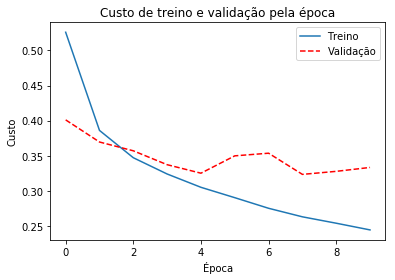

In [8]:
plotTrainValError(train_history3)

## Tentativa 2

In [9]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', bias_initializer='ones'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', bias_initializer='ones'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', bias_initializer='ones')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
train_history2 = model.fit(np.array(X_train),np.array(y_train),validation_data=(X_val, y_val),epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.7267 - accuracy: 0.7389 - val_loss: 0.4617 - val_accuracy: 0.8318
Epoch 2/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.5251 - accuracy: 0.8080 - val_loss: 0.4106 - val_accuracy: 0.8442
Epoch 3/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.4794 - accuracy: 0.8253 - val_loss: 0.3866 - val_accuracy: 0.8528
Epoch 4/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.4527 - accuracy: 0.8342 - val_loss: 0.3740 - val_accuracy: 0.8626
Epoch 5/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.4338 - accuracy: 0.8430 - val_loss: 0.3568 - val_accuracy: 0.8676
Epoch 6/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.4220 - accuracy: 0.8466 - val_loss: 0.3543 - val_accuracy: 0.8660
Epoch 7/20
48000/48000 [==============================] - 5s 103us/s

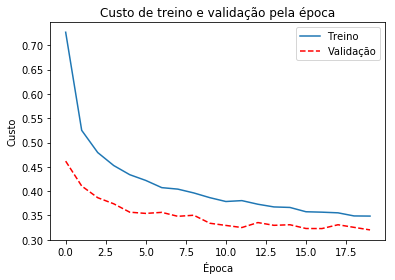

In [11]:
plotTrainValError(train_history2)

## Aplicando PCA

In [12]:
def applyPCA(ncomp, trainData, valData):
    print("== Executando PCA - Reduzindo para ", ncomp, " componentes ==")
    pca = PCA(n_components=ncomp)
    pca.fit(trainData)
    newX_train = pca.transform(trainData)
    newX_val = pca.transform(valData)
    
    variancesPerFeature = pca.explained_variance_ratio_
    variance = np.sum(variancesPerFeature)
    
    print('Variância:', variance)
    return (newX_train, newX_val)

### 64 componentes

In [13]:
(newX_train, newX_val) = applyPCA(64,X_train, X_val)

== Executando PCA - Reduzindo para  64  componentes ==
Variância: 0.8811807180951166


In [14]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=300,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
48000/48000 [==============================] - 0s 6us/step - loss: 2.3067 - accuracy: 0.2193 - val_loss: 1.7326 - val_accuracy: 0.4195
Epoch 2/300
48000/48000 [==============================] - 0s 3us/step - loss: 1.5159 - accuracy: 0.4949 - val_loss: 1.1795 - val_accuracy: 0.6768
Epoch 3/300
48000/48000 [==============================] - 0s 3us/step - loss: 1.1002 - accuracy: 0.6741 - val_loss: 0.8748 - val_accuracy: 0.7625
Epoch 4/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.8871 - accuracy: 0.7315 - val_loss: 0.7147 - val_accuracy: 0.7886
Epoch 5/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.7567 - accuracy: 0.7605 - val_loss: 0.6256 - val_accuracy: 0.7992
Epoch 6/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.6858 - accuracy: 0.7744 - val_loss: 0.5724 - val_accuracy: 0.8078
Epoch 7/300
48000/48000 [==============================] - 0s 3us/st

48000/48000 [==============================] - 0s 3us/step - loss: 0.4205 - accuracy: 0.8489 - val_loss: 0.3831 - val_accuracy: 0.8605
Epoch 57/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4168 - accuracy: 0.8490 - val_loss: 0.3818 - val_accuracy: 0.8608
Epoch 58/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4173 - accuracy: 0.8509 - val_loss: 0.3813 - val_accuracy: 0.8615
Epoch 59/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4168 - accuracy: 0.8493 - val_loss: 0.3805 - val_accuracy: 0.8613
Epoch 60/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4146 - accuracy: 0.8514 - val_loss: 0.3800 - val_accuracy: 0.8614
Epoch 61/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4141 - accuracy: 0.8510 - val_loss: 0.3796 - val_accuracy: 0.8623
Epoch 62/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4137 - accuracy: 0.8508 - val_loss: 0.3793 

48000/48000 [==============================] - 0s 4us/step - loss: 0.3925 - accuracy: 0.8589 - val_loss: 0.3651 - val_accuracy: 0.8662
Epoch 112/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3911 - accuracy: 0.8591 - val_loss: 0.3649 - val_accuracy: 0.8647
Epoch 113/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3901 - accuracy: 0.8596 - val_loss: 0.3640 - val_accuracy: 0.8659
Epoch 114/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3926 - accuracy: 0.8584 - val_loss: 0.3642 - val_accuracy: 0.8658
Epoch 115/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3925 - accuracy: 0.8571 - val_loss: 0.3640 - val_accuracy: 0.8652
Epoch 116/300
48000/48000 [==============================] - 0s 4us/step - loss: 0.3897 - accuracy: 0.8586 - val_loss: 0.3640 - val_accuracy: 0.8651
Epoch 117/300
48000/48000 [==============================] - 0s 4us/step - loss: 0.3916 - accuracy: 0.8597 - val_loss: 0

48000/48000 [==============================] - 0s 3us/step - loss: 0.3816 - accuracy: 0.8613 - val_loss: 0.3613 - val_accuracy: 0.8683
Epoch 167/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3805 - accuracy: 0.8628 - val_loss: 0.3608 - val_accuracy: 0.8683
Epoch 168/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3824 - accuracy: 0.8622 - val_loss: 0.3610 - val_accuracy: 0.8686
Epoch 169/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3787 - accuracy: 0.8625 - val_loss: 0.3608 - val_accuracy: 0.8691
Epoch 170/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3807 - accuracy: 0.8623 - val_loss: 0.3616 - val_accuracy: 0.8692
Epoch 171/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3816 - accuracy: 0.8631 - val_loss: 0.3608 - val_accuracy: 0.8687
Epoch 172/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3796 - accuracy: 0.8628 - val_loss: 0

48000/48000 [==============================] - 0s 3us/step - loss: 0.3764 - accuracy: 0.8641 - val_loss: 0.3602 - val_accuracy: 0.8689
Epoch 222/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3766 - accuracy: 0.8626 - val_loss: 0.3605 - val_accuracy: 0.8687
Epoch 223/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3749 - accuracy: 0.8648 - val_loss: 0.3610 - val_accuracy: 0.8688
Epoch 224/300
48000/48000 [==============================] - 0s 4us/step - loss: 0.3748 - accuracy: 0.8646 - val_loss: 0.3602 - val_accuracy: 0.8679
Epoch 225/300
48000/48000 [==============================] - 0s 4us/step - loss: 0.3761 - accuracy: 0.8644 - val_loss: 0.3608 - val_accuracy: 0.8694
Epoch 226/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3706 - accuracy: 0.8642 - val_loss: 0.3604 - val_accuracy: 0.8691
Epoch 227/300
48000/48000 [==============================] - 0s 4us/step - loss: 0.3737 - accuracy: 0.8640 - val_loss: 0

48000/48000 [==============================] - 0s 3us/step - loss: 0.3685 - accuracy: 0.8667 - val_loss: 0.3589 - val_accuracy: 0.8706
Epoch 277/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3699 - accuracy: 0.8658 - val_loss: 0.3585 - val_accuracy: 0.8711
Epoch 278/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3716 - accuracy: 0.8655 - val_loss: 0.3589 - val_accuracy: 0.8708
Epoch 279/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3718 - accuracy: 0.8665 - val_loss: 0.3589 - val_accuracy: 0.8711
Epoch 280/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3702 - accuracy: 0.8653 - val_loss: 0.3590 - val_accuracy: 0.8698
Epoch 281/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3716 - accuracy: 0.8646 - val_loss: 0.3593 - val_accuracy: 0.8708
Epoch 282/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3685 - accuracy: 0.8667 - val_loss: 0

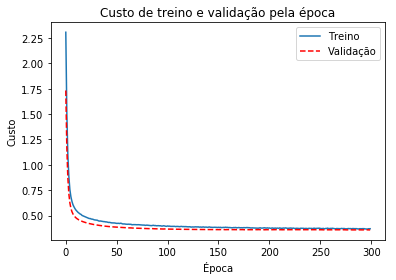

In [15]:
plotTrainValError(train_history_pca)

### 15 componentes

In [16]:
(newX_train, newX_val) = applyPCA(15,X_train, X_val)

== Executando PCA - Reduzindo para  15  componentes ==
Variância: 0.7588498408898439


In [17]:
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=150,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 0s 5us/step - loss: 2.5444 - accuracy: 0.1698 - val_loss: 2.0334 - val_accuracy: 0.2189
Epoch 2/150
48000/48000 [==============================] - 0s 2us/step - loss: 1.9676 - accuracy: 0.2441 - val_loss: 1.6156 - val_accuracy: 0.3699
Epoch 3/150
48000/48000 [==============================] - 0s 2us/step - loss: 1.6514 - accuracy: 0.3491 - val_loss: 1.3756 - val_accuracy: 0.5037
Epoch 4/150
48000/48000 [==============================] - 0s 2us/step - loss: 1.4650 - accuracy: 0.4358 - val_loss: 1.2261 - val_accuracy: 0.5715
Epoch 5/150
48000/48000 [==============================] - 0s 2us/step - loss: 1.3379 - accuracy: 0.4981 - val_loss: 1.1133 - val_accuracy: 0.6457
Epoch 6/150
48000/48000 [==============================] - 0s 2us/step - loss: 1.2388 - accuracy: 0.5456 - val_loss: 1.0168 - val_accuracy: 0.6916
Epoch 7/150
48000/48000 [==============================] - 0s 2us/st

48000/48000 [==============================] - 0s 4us/step - loss: 0.7281 - accuracy: 0.7264 - val_loss: 0.5920 - val_accuracy: 0.7729
Epoch 57/150
48000/48000 [==============================] - 0s 3us/step - loss: 0.7265 - accuracy: 0.7270 - val_loss: 0.5919 - val_accuracy: 0.7725
Epoch 58/150
48000/48000 [==============================] - 0s 3us/step - loss: 0.7278 - accuracy: 0.7239 - val_loss: 0.5908 - val_accuracy: 0.7751
Epoch 59/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.7262 - accuracy: 0.7286 - val_loss: 0.5904 - val_accuracy: 0.7746
Epoch 60/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.7266 - accuracy: 0.7275 - val_loss: 0.5899 - val_accuracy: 0.7729
Epoch 61/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.7254 - accuracy: 0.7280 - val_loss: 0.5896 - val_accuracy: 0.7752
Epoch 62/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.7215 - accuracy: 0.7304 - val_loss: 0.5892 

48000/48000 [==============================] - 0s 4us/step - loss: 0.6917 - accuracy: 0.7467 - val_loss: 0.5674 - val_accuracy: 0.7912
Epoch 112/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.6917 - accuracy: 0.7465 - val_loss: 0.5675 - val_accuracy: 0.7903
Epoch 113/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.6943 - accuracy: 0.7414 - val_loss: 0.5679 - val_accuracy: 0.7921
Epoch 114/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.6891 - accuracy: 0.7462 - val_loss: 0.5669 - val_accuracy: 0.7912
Epoch 115/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.6935 - accuracy: 0.7460 - val_loss: 0.5662 - val_accuracy: 0.7921
Epoch 116/150
48000/48000 [==============================] - 0s 2us/step - loss: 0.6899 - accuracy: 0.7465 - val_loss: 0.5658 - val_accuracy: 0.7918
Epoch 117/150
48000/48000 [==============================] - 0s 3us/step - loss: 0.6938 - accuracy: 0.7443 - val_loss: 0

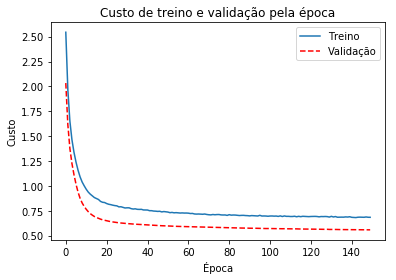

In [18]:
plotTrainValError(train_history_pca)

### 128 Componentes

In [19]:
(newX_train, newX_val) = applyPCA(128,X_train, X_val)

== Executando PCA - Reduzindo para  128  componentes ==
Variância: 0.9275087693309542


In [20]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=100,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 0s 10us/step - loss: 1.8322 - accuracy: 0.4043 - val_loss: 1.1685 - val_accuracy: 0.6927
Epoch 2/100
48000/48000 [==============================] - 0s 6us/step - loss: 0.9745 - accuracy: 0.7019 - val_loss: 0.6253 - val_accuracy: 0.7990
Epoch 3/100
48000/48000 [==============================] - 0s 6us/step - loss: 0.6780 - accuracy: 0.7736 - val_loss: 0.5003 - val_accuracy: 0.8257
Epoch 4/100
48000/48000 [==============================] - 0s 6us/step - loss: 0.5764 - accuracy: 0.7999 - val_loss: 0.4544 - val_accuracy: 0.8387
Epoch 5/100
48000/48000 [==============================] - 0s 7us/step - loss: 0.5371 - accuracy: 0.8134 - val_loss: 0.4318 - val_accuracy: 0.8453
Epoch 6/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.5081 - accuracy: 0.8215 - val_loss: 0.4178 - val_accuracy: 0.8489
Epoch 7/100
48000/48000 [==============================] - 0s 5us/s

48000/48000 [==============================] - 0s 5us/step - loss: 0.3032 - accuracy: 0.8886 - val_loss: 0.3119 - val_accuracy: 0.8858
Epoch 57/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.3030 - accuracy: 0.8892 - val_loss: 0.3119 - val_accuracy: 0.8838
Epoch 58/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.3013 - accuracy: 0.8907 - val_loss: 0.3109 - val_accuracy: 0.8853
Epoch 59/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.3008 - accuracy: 0.8905 - val_loss: 0.3115 - val_accuracy: 0.8852
Epoch 60/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.2994 - accuracy: 0.8913 - val_loss: 0.3107 - val_accuracy: 0.8857
Epoch 61/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.2971 - accuracy: 0.8922 - val_loss: 0.3104 - val_accuracy: 0.8855
Epoch 62/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.2964 - accuracy: 0.8927 - val_loss: 0.3105 

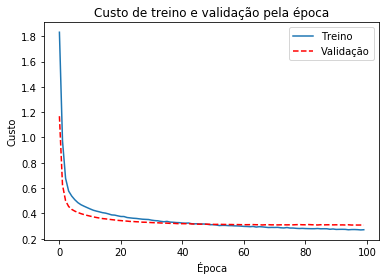

In [21]:
plotTrainValError(train_history_pca)

### 200 componentes

In [22]:
(newX_train, newX_val) = applyPCA(200,X_train, X_val)

== Executando PCA - Reduzindo para  200  componentes ==
Variância: 0.9532235057770232


In [23]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=60,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 1s 12us/step - loss: 1.5457 - accuracy: 0.4770 - val_loss: 0.7637 - val_accuracy: 0.7619
Epoch 2/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.7959 - accuracy: 0.7258 - val_loss: 0.5157 - val_accuracy: 0.8143
Epoch 3/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.6303 - accuracy: 0.7797 - val_loss: 0.4512 - val_accuracy: 0.8381
Epoch 4/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.5626 - accuracy: 0.8018 - val_loss: 0.4244 - val_accuracy: 0.8470
Epoch 5/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.5212 - accuracy: 0.8157 - val_loss: 0.4068 - val_accuracy: 0.8528
Epoch 6/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.5027 - accuracy: 0.8222 - val_loss: 0.3926 - val_accuracy: 0.8566
Epoch 7/60
48000/48000 [==============================] - 0s 8us/step - l

48000/48000 [==============================] - 0s 10us/step - loss: 0.2890 - accuracy: 0.8960 - val_loss: 0.3024 - val_accuracy: 0.8916
Epoch 57/60
48000/48000 [==============================] - 1s 10us/step - loss: 0.2866 - accuracy: 0.8971 - val_loss: 0.3012 - val_accuracy: 0.8909
Epoch 58/60
48000/48000 [==============================] - 1s 12us/step - loss: 0.2839 - accuracy: 0.8957 - val_loss: 0.3022 - val_accuracy: 0.8917
Epoch 59/60
48000/48000 [==============================] - 0s 10us/step - loss: 0.2867 - accuracy: 0.8960 - val_loss: 0.3010 - val_accuracy: 0.8915
Epoch 60/60
48000/48000 [==============================] - 0s 9us/step - loss: 0.2804 - accuracy: 0.8984 - val_loss: 0.3019 - val_accuracy: 0.8904


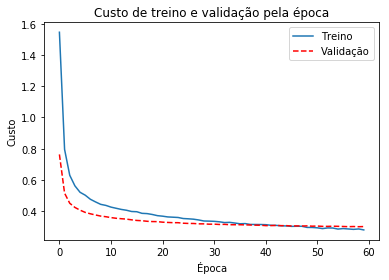

In [24]:
plotTrainValError(train_history_pca)

# AutoEncoder

## Criando o autoencoder 1

In [25]:
inp = Input(shape=(784,))
encoder_2 = Dense(392, activation='relu',name="encoder1")(inp)
encoder_2 = Dense(128, activation='relu',name="encoder2")(encoder_2)

decoder_2 = Dense(392, activation='relu', name='decoder1')(encoder_2)
decoder_2 = Dense(784, activation='relu', name='decoder2')(decoder_2)

autoencoder_2 = Model(inputs=inp, outputs=decoder_2)
autoencoder_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoder1 (Dense)             (None, 392)               307720    
_________________________________________________________________
encoder2 (Dense)             (None, 128)               50304     
_________________________________________________________________
decoder1 (Dense)             (None, 392)               50568     
_________________________________________________________________
decoder2 (Dense)             (None, 784)               308112    
Total params: 716,704
Trainable params: 716,704
Non-trainable params: 0
_________________________________________________________________


In [26]:
autoencoder_2.compile(optimizer='adam', loss='mse')

In [27]:
train_history_autoencoder_2 = autoencoder_2.fit(X_train,X_train,validation_data=(X_val, X_val),batch_size=1000,epochs=50)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 106us/step - loss: 0.0673 - val_loss: 0.0367
Epoch 2/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.0299 - val_loss: 0.0251
Epoch 3/50
48000/48000 [==============================] - 4s 83us/step - loss: 0.0229 - val_loss: 0.0209
Epoch 4/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.0197 - val_loss: 0.0185
Epoch 5/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.0181 - val_loss: 0.0173
Epoch 6/50
48000/48000 [==============================] - 4s 89us/step - loss: 0.0170 - val_loss: 0.0165
Epoch 7/50
48000/48000 [==============================] - 4s 82us/step - loss: 0.0160 - val_loss: 0.0156
Epoch 8/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.0153 - val_loss: 0.0150
Epoch 9/50
48000/48000 [==============================] - 4s 82us/step - loss: 0.0148 - val_loss: 0.0146
Epo

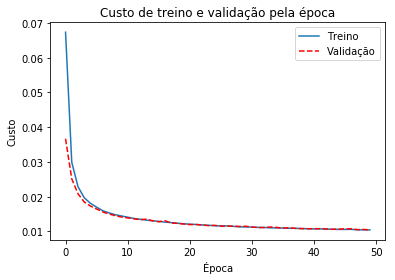

In [28]:
plotTrainValError(train_history_autoencoder_2)

## Utilizando o autoencoder no modelo

### Transformando imagens com o encoder

In [29]:
encoder_2_model = Model(inputs = inp, outputs=encoder_2)
X_train_encoded = encoder_2_model.predict(np.array(X_train))

X_val_encoded = encoder_2_model.predict(np.array(X_val))

### Normalizar os dados encodados

In [30]:
X_val_encoded_n = sklearn.preprocessing.normalize(X_val_encoded)
X_train_encoded_n = sklearn.preprocessing.normalize(X_train_encoded)

## Criando o modelo

In [31]:
inp_model_enc_2 = Input(shape=(128,))
layers_enc_2 = Dense(64, activation='relu',name='model1')(inp_model_enc_2)
layers_enc_2 = Dropout(0.5)(layers_enc_2)
layers_enc_2 = Dense(10, activation='softmax',name='model2')(layers_enc_2)

model_enc_2 = Model(inputs=inp_model_enc_2, outputs=layers_enc_2)
model_enc_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128)               0         
_________________________________________________________________
model1 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
model2 (Dense)               (None, 10)                650       
Total params: 8,906
Trainable params: 8,906
Non-trainable params: 0
_________________________________________________________________


### Treinando dados encodados sem normalização

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 0s 7us/step - loss: 1.8682 - accuracy: 0.3465 - val_loss: 1.2684 - val_accuracy: 0.6267
Epoch 2/100
48000/48000 [==============================] - 0s 4us/step - loss: 1.2533 - accuracy: 0.5581 - val_loss: 0.9163 - val_accuracy: 0.7327
Epoch 3/100
48000/48000 [==============================] - 0s 4us/step - loss: 1.0265 - accuracy: 0.6376 - val_loss: 0.7723 - val_accuracy: 0.7560
Epoch 4/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.9066 - accuracy: 0.6789 - val_loss: 0.6942 - val_accuracy: 0.7710
Epoch 5/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.8375 - accuracy: 0.7015 - val_loss: 0.6469 - val_accuracy: 0.7803
Epoch 6/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.7826 - accuracy: 0.7230 - val_loss: 0.6166 - val_accuracy: 0.7847
Epoch 7/100
48000/48000 [==============================] - 0s 4us/st

48000/48000 [==============================] - 0s 4us/step - loss: 0.4786 - accuracy: 0.8286 - val_loss: 0.4016 - val_accuracy: 0.8523
Epoch 56/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.4817 - accuracy: 0.8280 - val_loss: 0.4007 - val_accuracy: 0.8513
Epoch 57/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.4764 - accuracy: 0.8275 - val_loss: 0.4001 - val_accuracy: 0.8530
Epoch 58/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.4773 - accuracy: 0.8298 - val_loss: 0.3991 - val_accuracy: 0.8516
Epoch 59/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.4767 - accuracy: 0.8288 - val_loss: 0.3981 - val_accuracy: 0.8524
Epoch 60/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.4775 - accuracy: 0.8281 - val_loss: 0.3968 - val_accuracy: 0.8539
Epoch 61/100
48000/48000 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.82 - 0s 4us/step - loss: 0.4

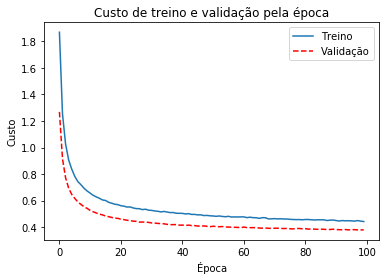

In [32]:
model_enc_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_autoencoder_2_in_data_set_without_norm = model_enc_2.fit(X_train_encoded,y_train,validation_data=(X_val_encoded, y_val),batch_size=1000,epochs=100)
plotTrainValError(train_history_autoencoder_2_in_data_set_without_norm)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.7958 - accuracy: 0.7450 - val_loss: 0.5405 - val_accuracy: 0.8133
Epoch 2/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.6051 - accuracy: 0.7900 - val_loss: 0.4832 - val_accuracy: 0.8227
Epoch 3/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.5593 - accuracy: 0.8035 - val_loss: 0.4618 - val_accuracy: 0.8303 0s - loss: 0.5608 - accuracy
Epoch 4/100
48000/48000 [==============================] - 2s 41us/step - loss: 0.5384 - accuracy: 0.8090 - val_loss: 0.4490 - val_accuracy: 0.8338
Epoch 5/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.5232 - accuracy: 0.8144 - val_loss: 0.4359 - val_accuracy: 0.8353
Epoch 6/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.5095 - accuracy: 0.8206 - val_loss: 0.4348 - val_accuracy: 0.8362
Epoch 7/100
48000/48000 [========

48000/48000 [==============================] - 2s 36us/step - loss: 0.4363 - accuracy: 0.8403 - val_loss: 0.3793 - val_accuracy: 0.8615
Epoch 56/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.4374 - accuracy: 0.8416 - val_loss: 0.3817 - val_accuracy: 0.8612
Epoch 57/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.4347 - accuracy: 0.8422 - val_loss: 0.3761 - val_accuracy: 0.8639
Epoch 58/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.4376 - accuracy: 0.8420 - val_loss: 0.3780 - val_accuracy: 0.8619
Epoch 59/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.4350 - accuracy: 0.8417 - val_loss: 0.3800 - val_accuracy: 0.8614
Epoch 60/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.4372 - accuracy: 0.8419 - val_loss: 0.3768 - val_accuracy: 0.8595
Epoch 61/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.4366 - accuracy: 0.8418 - val_loss: 

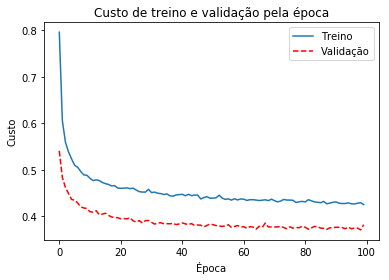

In [33]:
model_enc_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_autoencoder_2_in_data_set = model_enc_2.fit(X_train_encoded_n,y_train,validation_data=(X_val_encoded_n, y_val),epochs=100)
plotTrainValError(train_history_autoencoder_2_in_data_set)

## Criando o autoencoder 2

In [34]:
inp = Input(shape=(784,))
encoder_1 = Dense(256, activation='sigmoid',name="encoder1")(inp)
decoder_1 = Dense(784, activation='sigmoid', name='decoder2')(encoder_1)

autoencoder_1 = Model(inputs=inp, outputs=decoder_1)
autoencoder_1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoder1 (Dense)             (None, 256)               200960    
_________________________________________________________________
decoder2 (Dense)             (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [35]:
autoencoder_1.compile(optimizer='adam', loss='mse')

In [36]:
train_history_autoencoder_1 = autoencoder_1.fit(X_train,X_train,validation_data=(X_val, X_val),batch_size=1000,epochs=50)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.0831 - val_loss: 0.0553
Epoch 2/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.0481 - val_loss: 0.0413
Epoch 3/50
48000/48000 [==============================] - 3s 67us/step - loss: 0.0374 - val_loss: 0.0334
Epoch 4/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.0313 - val_loss: 0.0289
Epoch 5/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.0277 - val_loss: 0.0261
Epoch 6/50
48000/48000 [==============================] - 4s 76us/step - loss: 0.0252 - val_loss: 0.0240
Epoch 7/50
48000/48000 [==============================] - 4s 87us/step - loss: 0.0234 - val_loss: 0.0223
Epoch 8/50
48000/48000 [==============================] - 4s 88us/step - loss: 0.0218 - val_loss: 0.0210
Epoch 9/50
48000/48000 [==============================] - 4s 92us/step - loss: 0.0205 - val_loss: 0.0198
Epoch

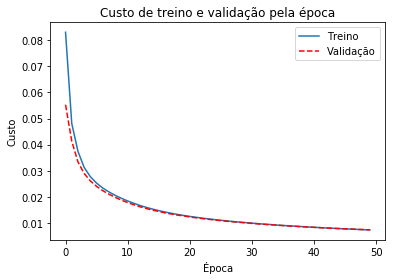

In [37]:
plotTrainValError(train_history_autoencoder_1)

## Utilizando o autoencoder no modelo

### Transformando imagens com o encoder

In [38]:
encoder_1_model = Model(inputs = inp, outputs=encoder_1)
X_train_encoded = encoder_1_model.predict(np.array(X_train))

X_val_encoded = encoder_1_model.predict(np.array(X_val))

### Normalizar os dados encodados

In [39]:
X_val_encoded_n = sklearn.preprocessing.normalize(X_val_encoded)
X_train_encoded_n = sklearn.preprocessing.normalize(X_train_encoded)

## Criando o modelo

In [40]:
inp_model_enc_1 = Input(shape=(256,))
layers_enc_1 = Dense(128, activation='relu',name='model1')(inp_model_enc_1)
layers_enc_1 = Dropout(0.5)(layers_enc_1)
layers_enc_1 = Dense(64, activation='relu',name='model2')(layers_enc_1)
layers_enc_1 = Dropout(0.2)(layers_enc_1)
layers_enc_1 = Dense(10, activation='softmax',name='model3')(layers_enc_1)

model_enc_1 = Model(inputs=inp_model_enc_1, outputs=layers_enc_1)
model_enc_1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256)               0         
_________________________________________________________________
model1 (Dense)               (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
model2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
model3 (Dense)               (None, 10)                650       
Total params: 41,802
Trainable params: 41,802
Non-trainable params: 0
_______________________________________________________

### Treinando dados encodados sem normalização

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 16us/step - loss: 1.7399 - accuracy: 0.3901 - val_loss: 0.8882 - val_accuracy: 0.7365
Epoch 2/100
48000/48000 [==============================] - 0s 9us/step - loss: 0.9208 - accuracy: 0.6675 - val_loss: 0.6067 - val_accuracy: 0.7743
Epoch 3/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.7339 - accuracy: 0.7369 - val_loss: 0.5262 - val_accuracy: 0.8043
Epoch 4/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.6562 - accuracy: 0.7671 - val_loss: 0.4911 - val_accuracy: 0.8159
Epoch 5/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.6101 - accuracy: 0.7834 - val_loss: 0.4686 - val_accuracy: 0.8283
Epoch 6/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.5788 - accuracy: 0.7944 - val_loss: 0.4511 - val_accuracy: 0.8320
Epoch 7/100
48000/48000 [==============================] - 1s 1

Epoch 56/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.3719 - accuracy: 0.8657 - val_loss: 0.3318 - val_accuracy: 0.8803
Epoch 57/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.3680 - accuracy: 0.8671 - val_loss: 0.3326 - val_accuracy: 0.8798
Epoch 58/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.3690 - accuracy: 0.8669 - val_loss: 0.3344 - val_accuracy: 0.8800
Epoch 59/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.3739 - accuracy: 0.8662 - val_loss: 0.3267 - val_accuracy: 0.8797
Epoch 60/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.3665 - accuracy: 0.8686 - val_loss: 0.3291 - val_accuracy: 0.8798
Epoch 61/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.3687 - accuracy: 0.8671 - val_loss: 0.3292 - val_accuracy: 0.8786
Epoch 62/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.3667 - accuracy: 0.8682

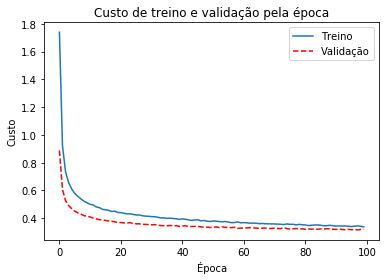

In [41]:
model_enc_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_autoencoder_1_in_data_set_without_norm = model_enc_1.fit(X_train_encoded,y_train,validation_data=(X_val_encoded, y_val),batch_size=1000,epochs=100)
plotTrainValError(train_history_autoencoder_1_in_data_set_without_norm)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 56us/step - loss: 0.4714 - accuracy: 0.8346 - val_loss: 0.3693 - val_accuracy: 0.8633
Epoch 2/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.4301 - accuracy: 0.8442 - val_loss: 0.3478 - val_accuracy: 0.8710
Epoch 3/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.4133 - accuracy: 0.8500 - val_loss: 0.3443 - val_accuracy: 0.8732
Epoch 4/100
48000/48000 [==============================] - 2s 51us/step - loss: 0.4129 - accuracy: 0.8500 - val_loss: 0.3474 - val_accuracy: 0.8752
Epoch 5/100
48000/48000 [==============================] - 3s 55us/step - loss: 0.4008 - accuracy: 0.8544 - val_loss: 0.3467 - val_accuracy: 0.8724
Epoch 6/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.3986 - accuracy: 0.8546 - val_loss: 0.3483 - val_accuracy: 0.8680
Epoch 7/100
48000/48000 [==============================] - 3s 

48000/48000 [==============================] - 4s 76us/step - loss: 0.3435 - accuracy: 0.8739 - val_loss: 0.3118 - val_accuracy: 0.8864
Epoch 56/100
48000/48000 [==============================] - 4s 73us/step - loss: 0.3440 - accuracy: 0.8731 - val_loss: 0.3195 - val_accuracy: 0.8818
Epoch 57/100
48000/48000 [==============================] - 3s 67us/step - loss: 0.3439 - accuracy: 0.8761 - val_loss: 0.3092 - val_accuracy: 0.8889
Epoch 58/100
48000/48000 [==============================] - 3s 62us/step - loss: 0.3454 - accuracy: 0.8734 - val_loss: 0.3087 - val_accuracy: 0.8902
Epoch 59/100
48000/48000 [==============================] - 3s 57us/step - loss: 0.3456 - accuracy: 0.8736 - val_loss: 0.3129 - val_accuracy: 0.8845
Epoch 60/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.3475 - accuracy: 0.8732 - val_loss: 0.3214 - val_accuracy: 0.8811
Epoch 61/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.3426 - accuracy: 0.8753 - val_loss: 

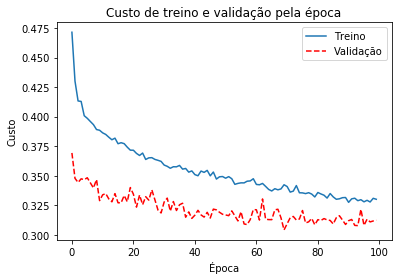

In [42]:
model_enc_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_autoencoder_1_in_data_set = model_enc_1.fit(X_train_encoded_n,y_train,validation_data=(X_val_encoded_n, y_val),epochs=100)
plotTrainValError(train_history_autoencoder_1_in_data_set)

# Clusterização

### Métricas para a clusterização

* Calcular a silhueta do cluster -> sklearn
* Definir como comparar:
    * Quantos de cada cluster foram corretamente classificados => A partir do cluster mais frequente
    * Para cada classe pegar o cluster que mais aparece
* Fazer variações com o objetivo de encontrar 10 classes no DBScan

In [74]:
def getClusterOfClass(classNumber, clusterPredictions, targets):
    indexOfClass = np.where(targets == classNumber)
    clustersOfClass = clusterPredictions[indexOfClass]
    values = np.unique(clustersOfClass, return_counts=True)
    index = np.argmax(values[1])
    frequentCluster = values[0][index]
    return frequentCluster

In [44]:
def mostFrequentClassInCluster(clusterNumber, clusters,targets):
    return getClusterOfClass(clusterNumber, targets, clusters)

In [45]:
def correctPredictionsBasedOnClusterNumber(classNumber, clusterNumber, clusterPredictions, targets):
    indexOfClass = np.where(targets == classNumber)
    itemsOfClassInPrediction = clusterPredictions[indexOfClass]
    indexCorrectPrediction = np.where(itemsOfClassInPrediction == clusterNumber)
    
    numberOfCorrectClustering = indexCorrectPrediction[0].size
    numberOfItensOfClass = indexOfClass[0].size

    return (numberOfItensOfClass, numberOfCorrectClustering)

In [72]:
def metricsResult(nClasses, trainData, clusters, targets, dbscan=False):     
    print("======= Classes Summary ======")
    print(" Class | Cluster | Items | In Cluster | Correct Predictions")
    for c in range(nClasses):
        cluster = getClusterOfClass(c, clusters, targets)
        (totalClass, correctPred) = correctPredictionsBasedOnClusterNumber(c,cluster,clusters,targets)
        classCorrectPredictPorcent = correctPred/totalClass
        print(" ",c,"   |    ",cluster,"  | ", totalClass, "|   ", correctPred, "   | ", classCorrectPredictPorcent)
    print("\n")
    
    print('Clusters:', np.unique(clusters))
    numberOfClusters = np.unique(clusters).size
        
    
    if(numberOfClusters > 1):
        print("===== Cluster Summary ======")
        print("Number of clusters: ", numberOfClusters) 

        print(" Cluster | Most Frequent Class ")
        clusterRange = range(numberOfClusters)
        
        if(dbscan):
            clusterRange = range(-1,numberOfClusters-1)
            
        for c in clusterRange:
            classOfCluster = mostFrequentClassInCluster(c,clusters,targets)
            print("   ",c,"   |    ",classOfCluster,"   ")
        print('\n')

        print("======= Cluster Geral Results ======")
        silhouette = silhouette_score(trainData, clusters)
        print("Silhouette score:", silhouette)
        homogeneity = homogeneity_score(targets, clusters)
        print("Homogeneity score:", homogeneity)
        vmeasure = v_measure_score(targets, clusters) 
        print("V-measure score:", vmeasure)
    else:
        print("0 clusters")

In [47]:
def analyseKmeansClusterNumber(clusterRangeInit, clusterRangeEnd, data, init, ninit, maxIter):
    sse = {}
    for k in range(clusterRangeInit, clusterRangeEnd):
        kmeans = KMeans(n_clusters=k, init=init,n_init=ninit, max_iter=maxIter).fit(data)
        data['clusters'] = kmeans.labels_
        sse[k] = kmeans.inertia_
        sil_coeff = silhouette_score(data, kmeans.labels_, metric='euclidean')
        print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

## Execução do PCA para aplicar a classificação

Utilizamos 200 componentes

In [48]:
(X_train_pca, X_val_pca) = applyPCA(128, X_train, X_val)

== Executando PCA - Reduzindo para  128  componentes ==
Variância: 0.9275799649475553


## KMeans

### Analisando a quantidade de clusters

For n_clusters=5, The Silhouette Coefficient is 0.2113282875596052
For n_clusters=6, The Silhouette Coefficient is 0.19851589085937257
For n_clusters=7, The Silhouette Coefficient is 0.2179435738366965
For n_clusters=8, The Silhouette Coefficient is 0.2209330331215939
For n_clusters=9, The Silhouette Coefficient is 0.23800027260808979
For n_clusters=10, The Silhouette Coefficient is 0.2519219029839825
For n_clusters=11, The Silhouette Coefficient is 0.2272588149137265
For n_clusters=12, The Silhouette Coefficient is 0.2438823462666067
For n_clusters=13, The Silhouette Coefficient is 0.23196021837097142
For n_clusters=14, The Silhouette Coefficient is 0.2727216600527046
For n_clusters=15, The Silhouette Coefficient is 0.2566210123551987
For n_clusters=16, The Silhouette Coefficient is 0.2631856900105584
For n_clusters=17, The Silhouette Coefficient is 0.25344380953390166
For n_clusters=18, The Silhouette Coefficient is 0.27123342364612607
For n_clusters=19, The Silhouette Coefficient is

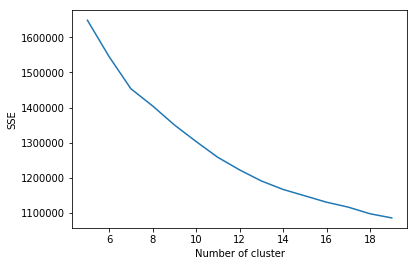

In [49]:
X_train_pca_df = pd.DataFrame(X_train_pca)
analyseKmeansClusterNumber(5,20, X_train_pca_df,'k-means++', 10, 500)

### Executando

In [50]:
def applyKmeans(nclasses, ncluster, init,ninit, maxIter, dataSet, labels):
    kMeansModel = KMeans(n_clusters=ncluster, init=init,n_init=ninit, max_iter=maxIter)
    predictions = kMeansModel.fit_predict(dataSet)
    metricsResult(nclasses, dataSet, predictions, labels)
    return predictions

In [51]:
applyKmeans(10, 7,'k-means++', 10, 500, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     1   |  4768 |    2960    |  0.6208053691275168
  1    |     4   |  4826 |    4292    |  0.8893493576460837
  2    |     2   |  4800 |    3022    |  0.6295833333333334
  3    |     4   |  4758 |    2424    |  0.5094577553593947
  4    |     2   |  4815 |    3069    |  0.6373831775700934
  5    |     3   |  4859 |    3384    |  0.6964395966248199
  6    |     5   |  4757 |    1884    |  0.39604792936724825
  7    |     3   |  4776 |    4458    |  0.9334170854271356
  8    |     6   |  4851 |    3243    |  0.66852195423624
  9    |     0   |  4790 |    4189    |  0.8745302713987474


===== Cluster Summary ======
Number of clusters:  7
 Cluster | Most Frequent Class 
    0    |     9    
    1    |     0    
    2    |     4    
    3    |     7    
    4    |     1    
    5    |     6    
    6    |     8    


======= Cluster Geral Results ======
Silhouette score: 0.18540008490506607


array([5, 3, 6, ..., 0, 1, 1], dtype=int32)

In [75]:
applyKmeans(10, 10,'k-means++', 10, 500, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     7   |  4768 |    2713    |  0.569001677852349
  1    |     2   |  4826 |    4335    |  0.8982594280978036
  2    |     1   |  4800 |    2816    |  0.5866666666666667
  3    |     2   |  4758 |    2535    |  0.5327868852459017
  4    |     1   |  4815 |    2898    |  0.6018691588785047
  5    |     6   |  4859 |    3121    |  0.6423132331755506
  6    |     3   |  4757 |    1661    |  0.3491696447340761
  7    |     0   |  4776 |    3728    |  0.7805695142378559
  8    |     8   |  4851 |    1980    |  0.40816326530612246
  9    |     4   |  4790 |    2423    |  0.5058455114822547


Clusters: [0 1 2 3 4 5 6 7 8 9]
===== Cluster Summary ======
Number of clusters:  10
 Cluster | Most Frequent Class 
    0    |     7    
    1    |     4    
    2    |     1    
    3    |     6    
    4    |     9    
    5    |     8    
    6    |     5    
    7    |     0    
    8    |     8    
 

array([6, 0, 5, ..., 9, 7, 7], dtype=int32)

## DBScan

In [68]:
def applyDBScan(eps, min_samples, dataSet, labels):
    dbscanModel = DBSCAN(eps, min_samples)
    predictions = dbscanModel.fit_predict(dataSet)
    metricsResult(10, dataSet, predictions, labels,True)
    return predictions

In [54]:
clusters_dbscan_1 = applyDBScan(0.5, 5, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     -1   |  4768 |    4768    |  1.0
  1    |     -1   |  4826 |    4826    |  1.0
  2    |     -1   |  4800 |    4800    |  1.0
  3    |     -1   |  4758 |    4758    |  1.0
  4    |     -1   |  4815 |    4815    |  1.0
  5    |     -1   |  4859 |    4859    |  1.0
  6    |     -1   |  4757 |    4757    |  1.0
  7    |     -1   |  4776 |    4776    |  1.0
  8    |     -1   |  4851 |    4851    |  1.0
  9    |     -1   |  4790 |    4790    |  1.0


0 clusters


In [80]:
clusters_dbscan_2 = applyDBScan(4, 5, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     0   |  4768 |    4215    |  0.884018456375839
  1    |     0   |  4826 |    4731    |  0.9803149606299213
  2    |     0   |  4800 |    4234    |  0.8820833333333333
  3    |     0   |  4758 |    4435    |  0.932114333753678
  4    |     0   |  4815 |    4469    |  0.928141225337487
  5    |     0   |  4859 |    3810    |  0.784111957192838
  6    |     0   |  4757 |    4127    |  0.8675635904982132
  7    |     0   |  4776 |    4705    |  0.9851340033500837
  8    |     0   |  4851 |    3502    |  0.7219130076272934
  9    |     0   |  4790 |    4419    |  0.9225469728601252


Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
===== Cluster Summary ======
Number of clusters:  17
 Cluster | Most Frequent Class 
    -1    |     8    
    0    |     1    
    1    |     8    
    2    |     8    
    3    |     8    
    4    |     8    
    5    |     9    
    6    |     

In [77]:
clusters_dbscan_3 = applyDBScan(1.3, 5, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     -1   |  4768 |    4760    |  0.9983221476510067
  1    |     -1   |  4826 |    4784    |  0.9912971404890178
  2    |     -1   |  4800 |    4797    |  0.999375
  3    |     -1   |  4758 |    4758    |  1.0
  4    |     -1   |  4815 |    4813    |  0.9995846313603323
  5    |     -1   |  4859 |    4815    |  0.9909446388145708
  6    |     -1   |  4757 |    4712    |  0.9905402564641581
  7    |     -1   |  4776 |    4776    |  1.0
  8    |     -1   |  4851 |    4851    |  1.0
  9    |     -1   |  4790 |    4790    |  1.0


Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
===== Cluster Summary ======
Number of clusters:  18
 Cluster | Most Frequent Class 
    -1    |     8    
    0    |     5    
    1    |     1    
    2    |     1    
    3    |     6    
    4    |     1    
    5    |     0    
    6    |     6    
    7    |     1    
    8    |     6    
    9

In [82]:
clusters_dbscan_2 = applyDBScan(5, 5, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     0   |  4768 |    4617    |  0.9683305369127517
  1    |     0   |  4826 |    4813    |  0.9973062577704103
  2    |     0   |  4800 |    4656    |  0.97
  3    |     0   |  4758 |    4695    |  0.9867591424968474
  4    |     0   |  4815 |    4755    |  0.9875389408099688
  5    |     0   |  4859 |    4542    |  0.9347602387322494
  6    |     0   |  4757 |    4595    |  0.9659449232709691
  7    |     0   |  4776 |    4770    |  0.9987437185929648
  8    |     0   |  4851 |    4585    |  0.9451659451659452
  9    |     0   |  4790 |    4744    |  0.9903966597077244


Clusters: [-1  0]
===== Cluster Summary ======
Number of clusters:  2
 Cluster | Most Frequent Class 
    -1    |     5    
    0    |     1    


======= Cluster Geral Results ======
Silhouette score: 0.07469627581593326
Homogeneity score: 0.003931792634948469
V-measure score: 0.007477039449826902


In [84]:
clusters_dbscan_2 = applyDBScan(4.05, 5, X_train_pca, np.array(y_train))

======= Classes Summary ======
 Class | Cluster | Items | In Cluster | Correct Predictions
  0    |     0   |  4768 |    4240    |  0.889261744966443
  1    |     0   |  4826 |    4740    |  0.9821798590965602
  2    |     0   |  4800 |    4272    |  0.89
  3    |     0   |  4758 |    4465    |  0.9384195039932745
  4    |     0   |  4815 |    4499    |  0.9343717549325026
  5    |     0   |  4859 |    3856    |  0.7935789257048775
  6    |     0   |  4757 |    4165    |  0.8755518183729241
  7    |     0   |  4776 |    4714    |  0.9870184254606366
  8    |     0   |  4851 |    3610    |  0.7441764584621727
  9    |     0   |  4790 |    4476    |  0.934446764091858


Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
===== Cluster Summary ======
Number of clusters:  13
 Cluster | Most Frequent Class 
    -1    |     8    
    0    |     1    
    1    |     8    
    2    |     8    
    3    |     8    
    4    |     8    
    5    |     8    
    6    |     9    
    7    |     8  